In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from dmrgwaytorho import *
import qutip as q
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import pickle 
from functions import doApplyHam,isingmodel,diagonalize
from functions import isingmodel_rev,isingmodel_rev_frac2
from permutations import get_dicts, rho_3,g_s
%load_ext autoreload

In [2]:
L=3
length=16
lambdarange=np.linspace(0.1,2)

In [3]:
%autoreload
from permutations import get_dicts, rho_3,g_s,rho_3new,rho_2new

dic,perm=get_dicts()

g=g_s(lambdarange)

rho_dic={}
for l in lambdarange:
    rho_dic[l]=rho_3new(dic,perm,g,l)


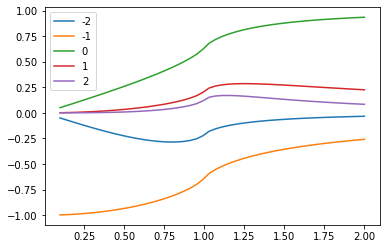

In [4]:
for k in range(-2,3):
    vv=np.zeros_like(lambdarange)
    for i,l in enumerate(lambdarange):
        vv[i]=g[k,l]
        #print(np.imag(eigvals(rho_dic[l])[k]))

    plt.plot(lambdarange,vv,label=k)
    plt.legend()


1.0


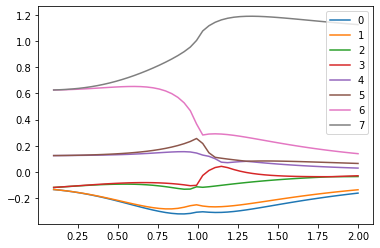

In [5]:
check=0
for k in range(8):
    vv=np.zeros_like(lambdarange)
    for i,l in enumerate(lambdarange):
        vv[i]=(eigvalsh(rho_dic[l])[k])
        
    check=check+vv[10]
    plt.plot(lambdarange,vv,label=k)
    plt.legend()
print(check)

In [6]:


dictionary_open0_3={}
dictionary_open1_3={}

for l in lambdarange:
    
    Energies,psis=diagonalize(2,length,isingmodel_rev_frac2(l,0.0),True)
    
    reshapedpsi0=psis[:,0].reshape(2**int((length-2)/2),8,2**int((length-4)/2)).transpose(1,0,2).reshape(8,-1)
    
    rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())
    
    reshapedpsi1=psis[:,1].reshape(2**int((length-2)/2),8,2**int((length-4)/2)).transpose(1,0,2).reshape(8,-1)
    
    rhomagn1 = np.dot(reshapedpsi1, reshapedpsi1.conjugate().transpose())
    
    dictionary_open0_3[l]=rhomagn0
    
    dictionary_open1_3[l]=rhomagn1
    

    print(l)

0.1
0.13877551020408163
0.17755102040816328
0.2163265306122449
0.25510204081632654
0.29387755102040813
0.3326530612244898
0.37142857142857144
0.4102040816326531
0.44897959183673475
0.4877551020408163
0.5265306122448979
0.5653061224489796
0.6040816326530613
0.6428571428571428
0.6816326530612244
0.7204081632653061
0.7591836734693878
0.7979591836734694
0.836734693877551
0.8755102040816326
0.9142857142857143
0.9530612244897959
0.9918367346938776
1.0306122448979593
1.0693877551020408
1.1081632653061226
1.146938775510204
1.1857142857142857
1.2244897959183674
1.263265306122449
1.3020408163265307
1.3408163265306123
1.379591836734694
1.4183673469387756
1.4571428571428573
1.495918367346939
1.5346938775510206
1.573469387755102
1.6122448979591837
1.6510204081632653
1.689795918367347
1.7285714285714286
1.7673469387755103
1.806122448979592
1.8448979591836736
1.8836734693877553
1.922448979591837
1.9612244897959186
2.0


In [7]:
rho_effective={}
for el in lambdarange:
    #rho_effective[el]=1/2*dictionary_open0_3[el]+1/2*dictionary_open1_3[el]
    rho_effective[el]=dictionary_open0_3[el]
    
rho_spectra={}
for el in lambdarange:
    rho_spectra[el]=np.sort(eigvalsh(rho_effective[el]))

    
rho_eigvecs={}   
for el in lambdarange:
    rho_eigvecs[el]=eigh(rho_effective[el])[1]
#1/2rho0+1/2rho1


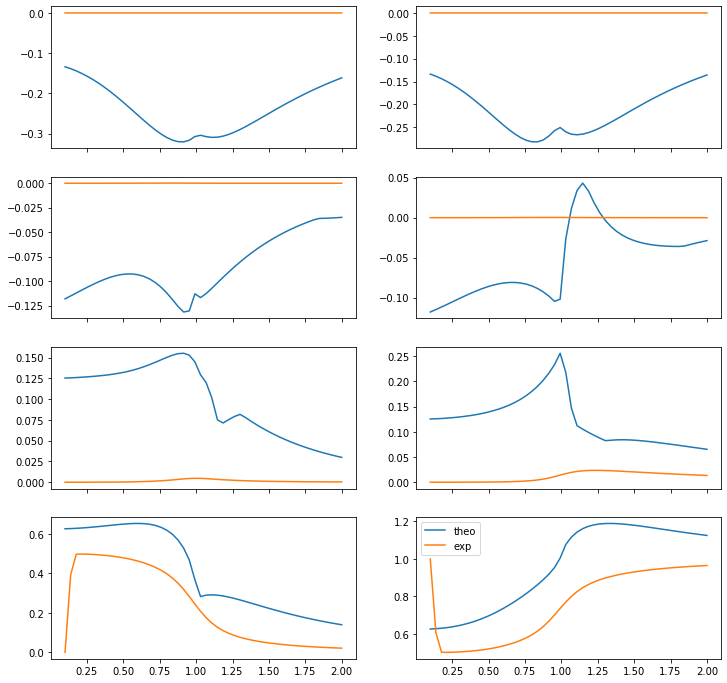

In [8]:
fig, axs = plt.subplots(4, 2,sharex=True,figsize=[12,12])
ind=[(x,y) for x in range(4) for y in range(2)]

for k in range(8):
        
    theovec=np.zeros_like(lambdarange)
    
    
    for i,el in enumerate(lambdarange):
        theovec[i]=eigvalsh(rho_dic[el])[k]
        
    espvec=np.zeros_like(lambdarange)
    
    
    for i,el in enumerate(lambdarange):
        espvec[i]=rho_spectra[el][k]   
        
    axs[ind[k]].plot(lambdarange,theovec,label="theo")   
    axs[ind[k]].plot(lambdarange,espvec,label="exp")
plt.legend()
plt.show()    

In [9]:
dictionary_open0={}
dictionary_open1={}

for l in lambdarange:
    
    Energies,psis=diagonalize(2,length,isingmodel_rev_frac2(l,0.0001),False)
    
    reshapedpsi0=psis[:,0].reshape(2**int((length-2)/2),4,2**int((length-2)/2)).transpose(1,0,2).reshape(4,-1)
    
    rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())
    
    reshapedpsi1=psis[:,1].reshape(2**int((length-2)/2),4,2**int((length-2)/2)).transpose(1,0,2).reshape(4,-1)
    
    rhomagn1 = np.dot(reshapedpsi1, reshapedpsi1.conjugate().transpose())
    
    dictionary_open0[l]=rhomagn0
    
    dictionary_open1[l]=rhomagn1
    

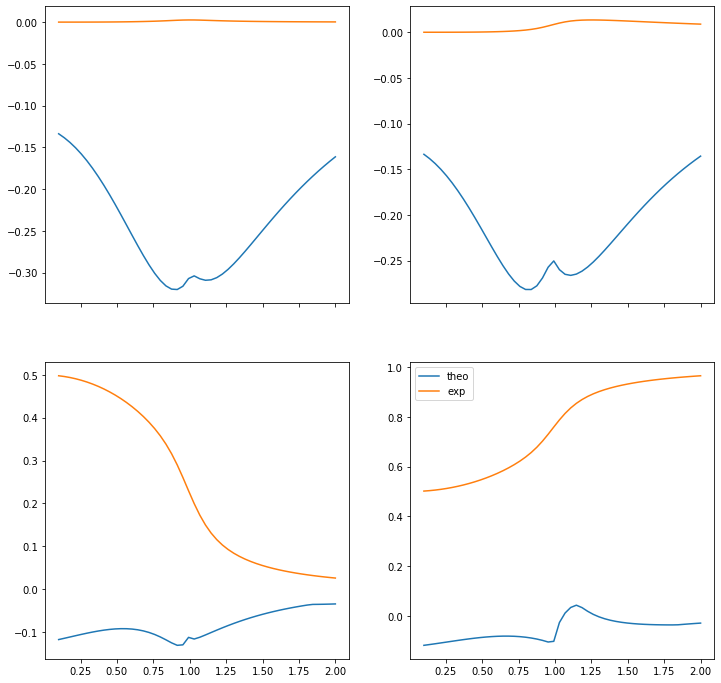

In [10]:
rho_effective={}
for el in lambdarange:
    rho_effective[el]=1/2*dictionary_open0[el]+1/2*dictionary_open1[el]
rho_spectra={}
for el in lambdarange:
    rho_spectra[el]=np.sort(eigvalsh(rho_effective[el]))
    #rho_spectra[el]=np.sort(eigvalsh(dictionary_open0[el]))
    
rho_eigvecs={}   
for el in lambdarange:
    rho_eigvecs[el]=eigh(rho_effective[el])[1]
#1/2rho0+1/2rho1

    
fig, axs = plt.subplots(2, 2,sharex=True,figsize=[12,12])
ind=[(x,y) for x in range(2) for y in range(2)]

for k in range(4):
        
    theovec=np.zeros_like(lambdarange)
    
    
    for i,el in enumerate(lambdarange):
        theovec[i]=eigvalsh(rho_dic[el])[k]
        
    espvec=np.zeros_like(lambdarange)
    
    
    for i,el in enumerate(lambdarange):
        espvec[i]=rho_spectra[el][k]   
        
    axs[ind[k]].plot(lambdarange,theovec,label="theo")   
    axs[ind[k]].plot(lambdarange,espvec,label="exp")
plt.legend()
plt.show()    